<a href="https://colab.research.google.com/github/Bettylu0608/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Prediction of Product Sales


- Author: Grecia Lopez



## Project Overview

## Load and Inspect Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(fpath)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [6]:
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

1) How many rows and columns?

In [7]:
df.shape

(8523, 12)

2) What are the datatypes of each variable?

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop_duplicates()

<Axes: >

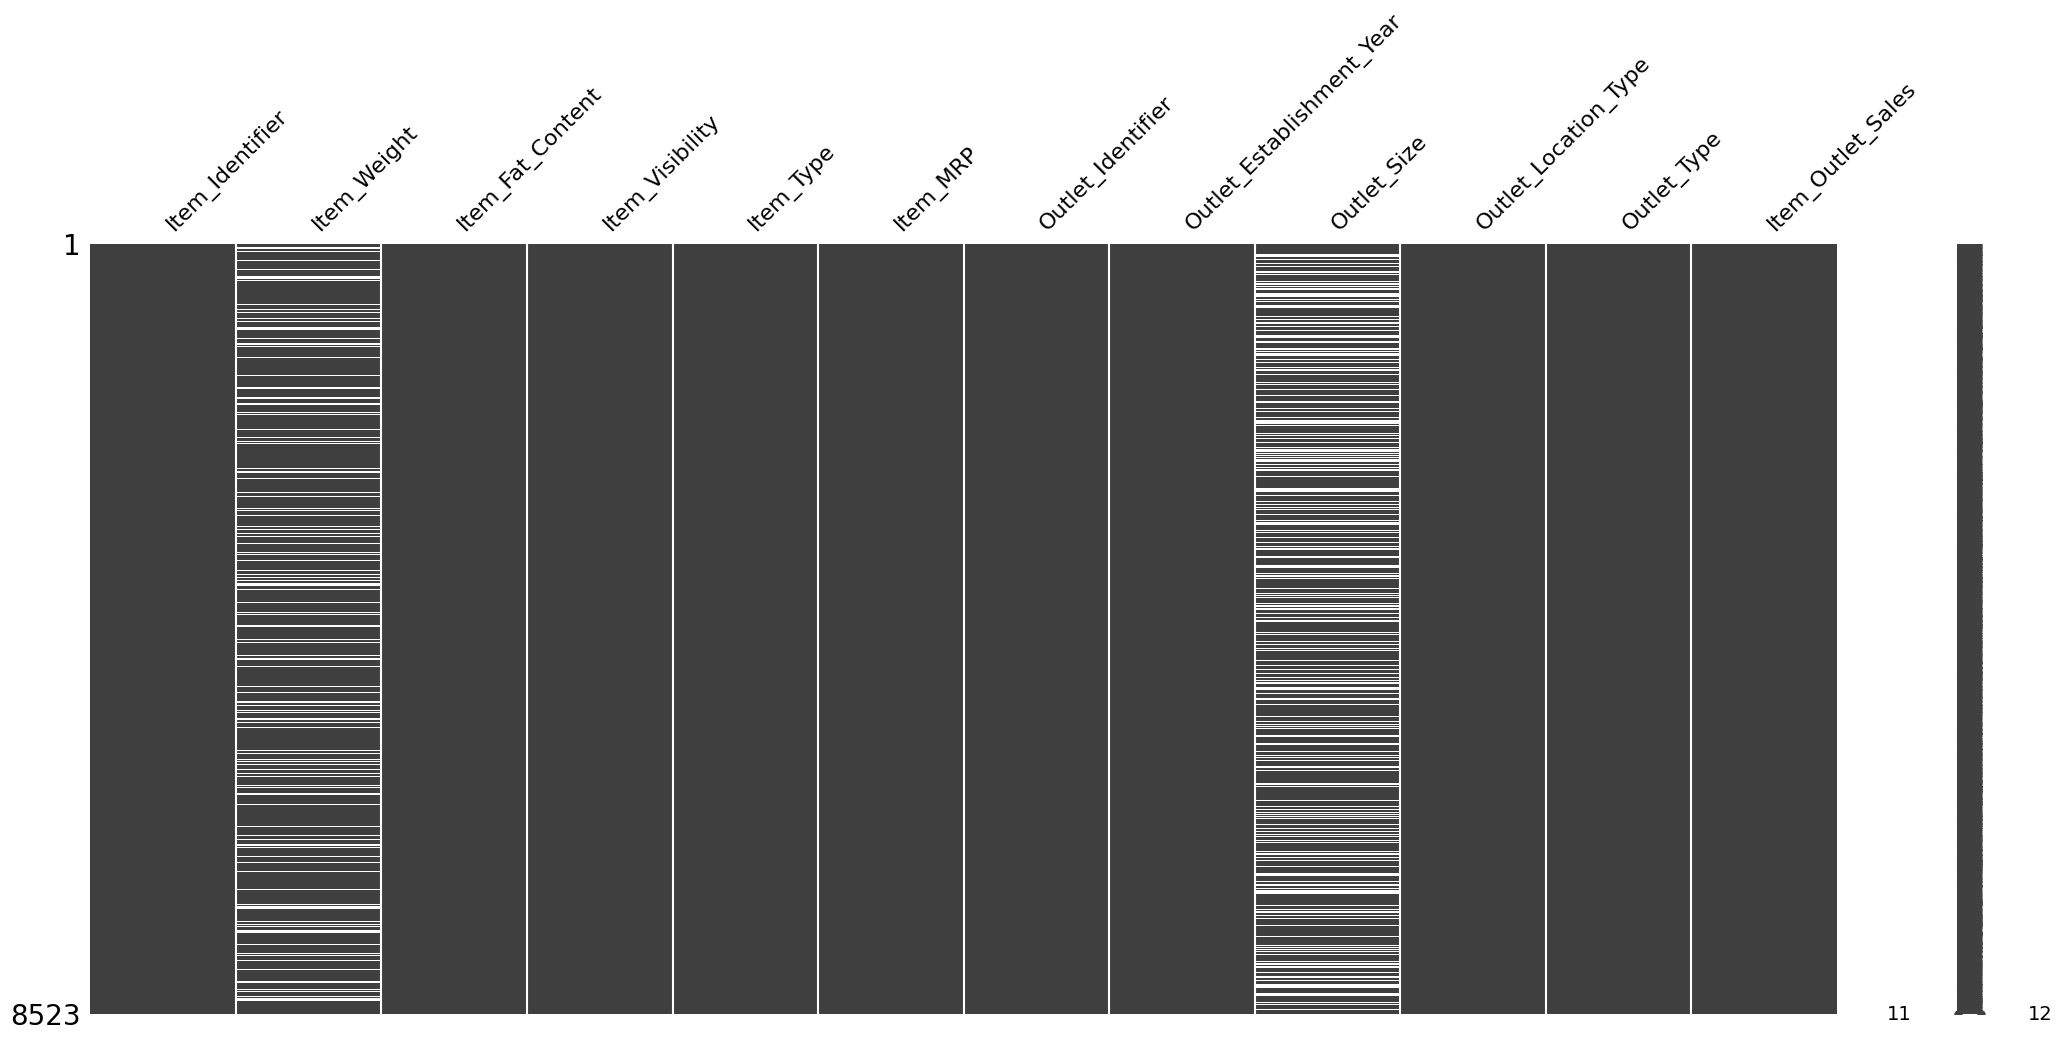

In [11]:
import missingno as msno
msno.matrix(df)

In [12]:
df.isnull().sum().sum()

3873

In [13]:
df.isnull().values.any()

True

In [14]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

5) Address the missing values by using a placeholder value.

In [15]:
df[cat_cols] =df[cat_cols].fillna('missing')


In [16]:
df_num_cols = df.select_dtypes('number').columns
df_num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
df[df_num_cols].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [18]:
null_weight = df['Item_Weight'].isna()
df[null_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [19]:
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

6) Confirm that there are no missing values after addressing them.

In [20]:
df['Item_Weight'].describe()

count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [21]:
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

7) Find and fix any inconsistend categories of data (for example: fix cat, Cat, and cat they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [22]:
df_num_cols = df.select_dtypes(include='number')

In [23]:
df_num_cols.mean()

Item_Weight                    10.478936
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [24]:
df_num_cols.max()

Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64

In [25]:
df_num_cols.min()

Item_Weight                    -1.00
Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
dtype: float64

## Exploratory Data Analysis

In [26]:
#Histograms
pd.set_option('display.max_columns',100)
df['Item_Outlet_Sales'].head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

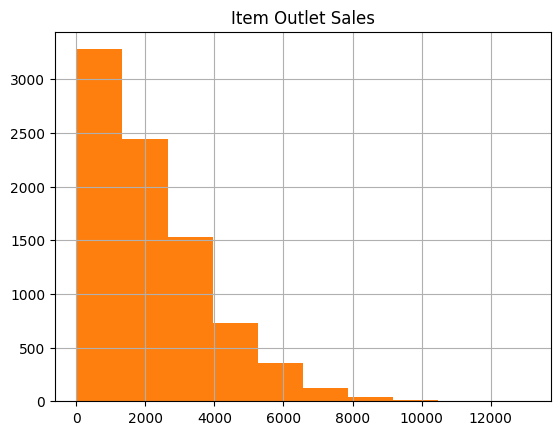

In [27]:
df['Item_Outlet_Sales'].hist()
ax = df['Item_Outlet_Sales'].hist()
ax.set_title('Item Outlet Sales');

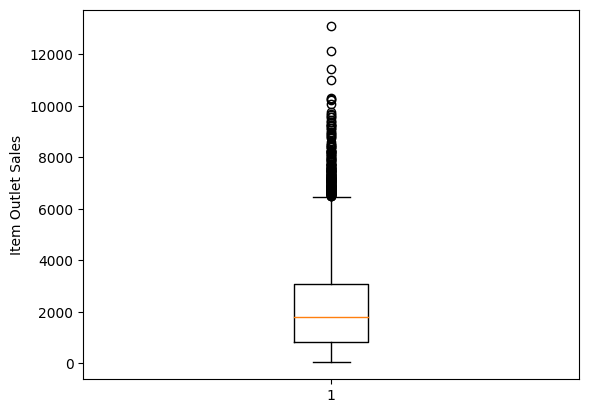

In [28]:
#Boxplots
fig, ax = plt.subplots()
data = df['Item_Outlet_Sales']
ax.boxplot(data)
ax.set_ylabel('Item Outlet Sales');

In [29]:
#Countplots
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [30]:
df[cat_cols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [31]:
df[cat_cols].isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Item_Identifier  Item_Fat_Content  Item_Type  Outlet_Identifier  \
0               False             False      False              False   
1               False             False      False              False   
2               False             False      False              False   
3               False             False      False              False   
4               False             False      False              False   
...               ...               ...        ...                ...   
8518            False             False      False              False   
8519            False             False      False              False   
8520            False             False      False              False   
8521            False             False      False              False   
8522            False             False      False              False   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0     

In [32]:
val_counts = df['Item_Fat_Content'].value_counts()
val_counts

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
df = df.replace({'Item_Fat_Content': {'LF': 'Low Fat',
                                 'low fat': 'Low Fat',
                                 'reg': 'Regular'}})
display(df['Item_Fat_Content'])

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [34]:
val_counts_freq = df['Item_Fat_Content'].value_counts(normalize=True) * 100
val_counts_freq

Low Fat    64.730729
Regular    35.269271
Name: Item_Fat_Content, dtype: float64

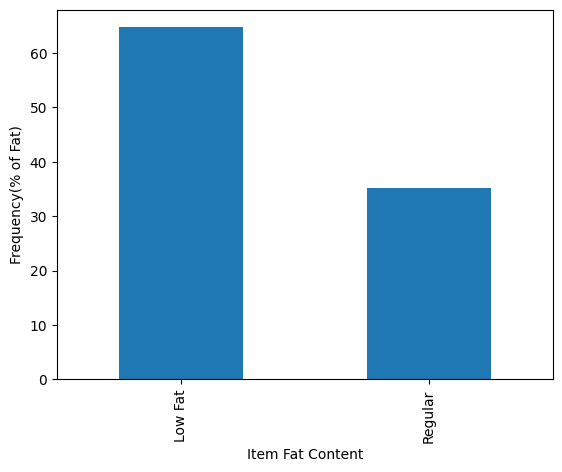

In [35]:
ax = val_counts_freq.plot(kind='bar')
ax.set_ylabel('Frequency(% of Fat)');
ax.set_xlabel('Item Fat Content');

In [36]:
#Heatmap
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


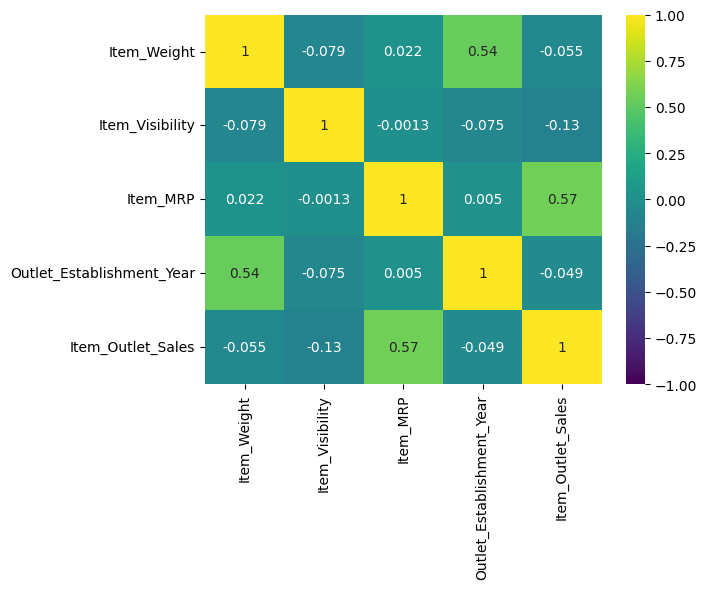

In [37]:
sns.heatmap(corr, vmin=-1, annot=True, cmap='viridis');

## Feature Inspection

# Data Dictionary

> Indented block
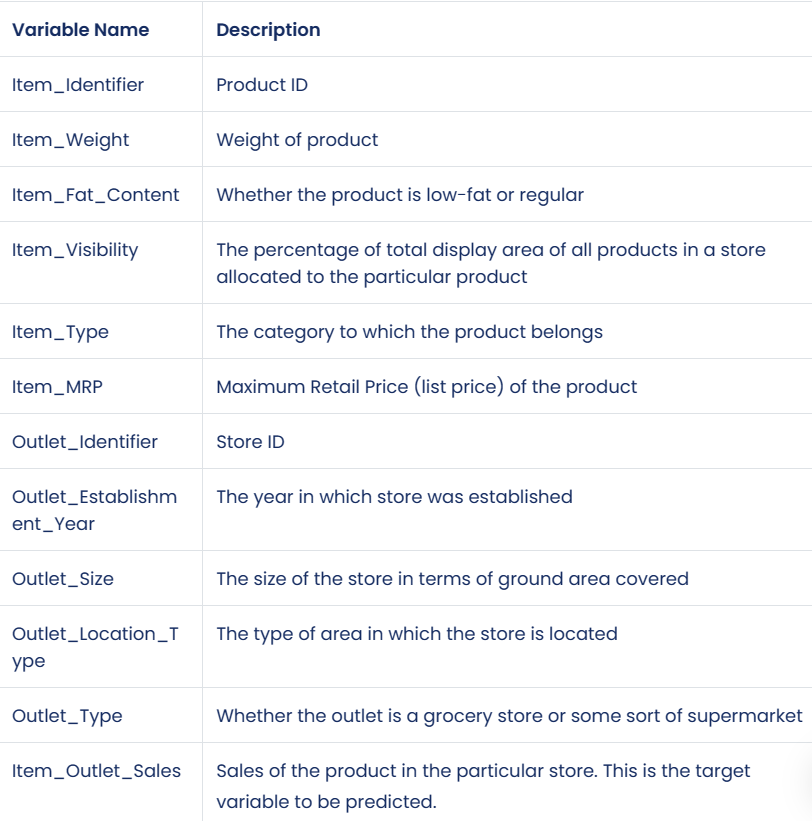


In [38]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,-1.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,missing,Tier 2,Supermarket Type1,4710.5350


In [39]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [40]:
df["Item_Type"].dtype

dtype('O')

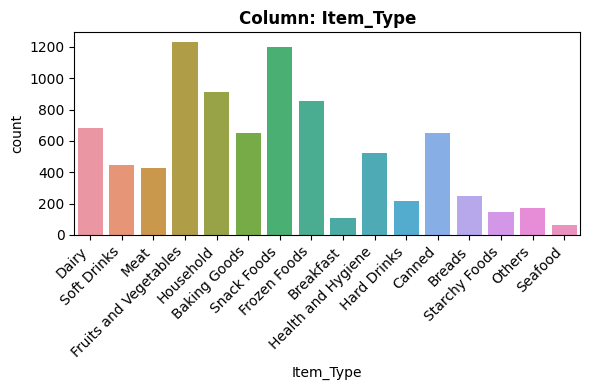

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [41]:
explore_categorical(df, 'Item_Type');

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - No there only (16) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

In [42]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

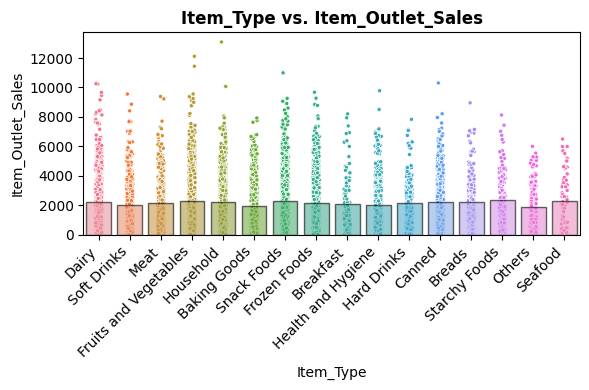

In [43]:
plot_categorical_vs_target(df, x='Item_Type', y='Item_Outlet_Sales');

1.)Based on your business understanding, would you expect this feature to be a predictor of the target?

I would predict that this feature is a direct predictor of the target.



2.)Does this feature appear to be a predictor of the target?

 This feature does seem to be a predictor of total sales.



In [44]:
# Part 5 Using Machine learning to make predictions
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.linear_model import LinearRegression

from sklearn import set_config
set_config(transform_output='pandas')

In [45]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(path)
df.info()
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# **Copy of Dataframe**

In [47]:
df2 = df.copy()

In [48]:
df2 = df.replace({'Item_Fat_Content': {'LF': 'Low Fat',
                                 'low fat': 'Low Fat',
                                 'reg': 'Regular'}})
display(df2['Item_Fat_Content'])

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
5       Regular
6       Regular
7       Low Fat
8       Regular
9       Regular
10      Low Fat
11      Regular
12      Regular
13      Regular
14      Low Fat
15      Regular
16      Low Fat
17      Regular
18      Low Fat
19      Low Fat
20      Regular
21      Regular
22      Low Fat
23      Low Fat
24      Regular
25      Low Fat
26      Regular
27      Low Fat
28      Regular
29      Regular
30      Low Fat
31      Low Fat
32      Low Fat
33      Low Fat
34      Low Fat
35      Low Fat
36      Regular
37      Regular
38      Regular
39      Low Fat
40      Low Fat
41      Low Fat
42      Low Fat
43      Low Fat
44      Regular
45      Low Fat
46      Low Fat
47      Low Fat
48      Regular
49      Regular
50      Low Fat
51      Low Fat
52      Regular
53      Low Fat
54      Low Fat
55      Low Fat
56      Low Fat
57      Low Fat
58      Low Fat
59      Low Fat
60      Low Fat
61      Regular
62      

In [49]:
df2 = df2.drop(columns='Item_Identifier')

In [50]:
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
df2.duplicated().sum()

0

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [53]:
df2.isna().sum().sum()

3873

In [54]:
df2.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [55]:
df2.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [56]:
df2.describe(include='object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,6113,8523,8523
unique,2,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,5517,1232,935,2793,3350,5577


In [57]:
df2['Item_Outlet_Sales'].isna().sum()

0

In [58]:
df2.dropna(subset=['Item_Outlet_Sales'], inplace=True)

In [59]:
percent_missing = (1 - df2.dropna().shape[0] / df.shape[0]) * 100
print(f'{percent_missing:.4f} percent of rows are missing at least 1 value')

45.4417 percent of rows are missing at least 1 value


In [60]:
target = 'Item_Outlet_Sales'
X = df2.drop(columns=[target]).copy()
y = df2[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35 , random_state=42)

In [61]:
X_train.shape

(5539, 10)

In [62]:
X_test.shape

(2984, 10)

In [63]:
y_train.shape

(5539,)

In [64]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
90,20.75,Low Fat,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,NaN,Tier 3,Grocery Store
4329,15.10,Regular,0.157155,Fruits and Vegetables,62.2194,OUT010,1998,NaN,Tier 3,Grocery Store
7775,12.35,Regular,0.033813,Meat,198.1426,OUT049,1999,Medium,Tier 1,Supermarket Type1
5480,8.75,Regular,0.074779,Fruits and Vegetables,186.3556,OUT045,2002,NaN,Tier 2,Supermarket Type1
4032,17.20,Regular,0.012012,Canned,163.1184,OUT046,1997,Small,Tier 1,Supermarket Type1


# **Pipelines/Tuples**

In [65]:
# Creating Pipelines

# Numerical
num_cols = X_train.select_dtypes("number").columns

print("Numeric Columns:", num_cols)

mean_imputer = SimpleImputer(strategy ='mean')
scaler = StandardScaler()

num_pipeline = make_pipeline(mean_imputer, scaler)

# Tuple
numeric_tuple = ("numeric",num_pipeline,num_cols)
num_pipeline

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [66]:
# Ordinal
ordinal_cols = ['Outlet_Size', "Outlet_Location_Type"]

OSize_list = ['Small', "Medium", "High"]
Olocation_list = ['Tier 1', 'Tier 2', "Tier 3"]

# Transformers
ord = OrdinalEncoder(categories=[OSize_list, Olocation_list])
freq_imputer = SimpleImputer(strategy='most_frequent')


scaler2 = StandardScaler()
ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)

# Tuple
ord_tuple = ('ordinal',ord_pipeline, ordinal_cols)
ord_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [67]:
# Nominal
nominal_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns

# Transformersimpute_missing = SimpleImputer(strategy='constant',fill_value='0')
impute_missing = SimpleImputer(strategy='constant',fill_value='0')

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Pipeline
nom_pipeline = make_pipeline(impute_missing, ohe)

# Tuple
ohe_tuple = ('categorical',nom_pipeline, nominal_cols)
ohe_tuple
nom_pipeline

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='0', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

# **Column** **Transformer**

---



In [68]:
col_transformer = ColumnTransformer([numeric_tuple,
                                       ord_tuple,
                                       ohe_tuple],
                                       remainder='drop', verbose_feature_names_out=False)

In [69]:
col_transformer.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='0',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

# **Processor**

In [70]:
# Transform the X_train and the X_test
X_train_proc = col_transformer.transform(X_train)
X_test_proc = col_transformer.transform(X_test)

In [71]:
display(X_train_proc.head())

# Check the shape
print(f'\nshape of processed data is: {X_train_proc.shape}')

# Check for remaining missing values
print(f'\nThere are {X_train_proc.isna().sum().sum()} missing values')

# Check the data types
print(f'\nThe datatypes are {X_train_proc.dtypes}')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
90,1.847353,-0.494773,-0.316972,0.012489,0.282529,1.084626,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4329,0.512424,1.784298,-1.272086,0.012489,0.282529,1.084626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7775,-0.137320,-0.623782,0.893291,0.131755,0.282529,-1.385664,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5480,-0.987895,0.176010,0.705513,0.489555,0.282529,-0.150519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4032,1.008592,-1.049423,0.335324,-0.106778,-1.382287,-1.385664,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0



shape of processed data is: (5539, 38)

There are 0 missing values

The datatypes are Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Outlet_Size                        float64
Outlet_Location_Type               float64
Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Household                float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_

# **Linear Regression**

In [72]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [73]:
X_train_proc.shape

(5539, 38)

In [74]:
X_train_proc.isna().sum()

Item_Weight                        0
Item_Visibility                    0
Item_MRP                           0
Outlet_Establishment_Year          0
Outlet_Size                        0
Outlet_Location_Type               0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
O

# **Linear Regression**

In [75]:
lin_reg.fit(X_train_proc, y_train)

LinearRegression()

In [76]:
X_train_proc.shape

(5539, 38)

In [77]:
y_train.shape

(5539,)

In [78]:
# View the intercept determined during the fit step
lin_reg.intercept_.round(2)

3067151608025602.5

In [79]:
y_pred_train = lin_reg.predict(X_train_proc)
y_pred_test = lin_reg.predict(X_test_proc)

In [80]:
# View the coefficents determined during the fit step
lin_reg.coef_.round(2)

array([-9.05000000e+00, -6.32000000e+00,  9.99610000e+02,  1.41184312e+16,
        7.76776779e+15, -9.63300296e+15,  3.40435722e+14,  3.40435722e+14,
        1.56631629e+14,  1.56631629e+14,  1.56631629e+14,  1.56631629e+14,
        1.56631629e+14,  1.56631629e+14,  1.56631629e+14,  1.56631629e+14,
        1.56631629e+14,  1.56631629e+14,  1.56631629e+14,  1.56631629e+14,
        1.56631629e+14,  1.56631629e+14,  1.56631629e+14,  1.56631629e+14,
       -2.00085502e+15,  1.83529926e+16, -1.42904385e+16, -5.43542600e+15,
        9.02489881e+15,  4.29599063e+15,  3.69303924e+15, -5.87114441e+15,
        3.58189492e+15, -1.27177240e+16,  6.51390733e+15, -8.24939456e+15,
       -8.57396865e+15,  2.21072263e+16])

Custom Evaluation Metrics

In [81]:
#Importing

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
# Define y_true and y_pred for the test data
y_true = y_test
y_pred = y_pred_test
# Provide a label for this data
label = 'Test Data'

**Helper Function**

In [83]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

## **Custom Function: evaluate_regression**



In [84]:
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train_proc)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test_proc)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [85]:
evaluate_regression(lin_reg, X_train_proc, y_train, X_test_proc, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 912.171
- MSE = 1,474,527.804
- RMSE = 1,214.301
- R^2 = 0.505

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 879.863
- MSE = 1,385,263.296
- RMSE = 1,176.972
- R^2 = 0.502


Compare the training vs. test R-squared values and answer the question: to what extent is this model overfit/underfit?

# Building a random forest model

In [100]:
#Imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Custom Function
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [92]:
# Defining Targets
y = df2['Item_Outlet_Sales']
X = df.drop(columns = ['Item_Outlet_Sales'])
# Split the data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [93]:
# Saving list of categorical columns
cat_cols = X_train.select_dtypes('object').columns
# Constructing categorical preprocessing objects
cat_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_pipe = make_pipeline(cat_imputer,ohe_encoder)
cat_tuple = ('cat',cat_pipe, cat_cols)
cat_tuple

('cat',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

In [103]:
# Save list of numeric columns
num_cols = X_train.select_dtypes('number').columns
# Constructing numeric preprocesssing objects
num_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
num_pipe = make_pipeline(num_imputer, scaler)
num_tuple = ('num',num_pipe, num_cols)

num_tuple

('num',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [108]:
# Preprocessor
preprocessor  = ColumnTransformer([numeric_tuple, cat_tuple],
                                  verbose_feature_names_out=False)

In [107]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [113]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

# **Imputing**

In [ ]:
X_train_proc.info()

In [ ]:
# Trying to get rid of null and nan values
impute_median = SimpleImputer(strategy='median')

In [ ]:
df2.select_dtypes('object').nunique()

In [ ]:
null_count = X_train[num_cols].isna().sum()
null_count[ null_count>0]

In [ ]:
impute_median.fit(X_train_proc[num_cols])

In [ ]:
null_count = X_test[num_cols].isna().sum()
null_count[ null_count>0]

In [ ]:
# Imputing num both X-Train and X-Test
X_train_num_imputed = impute_median.transform(X_train_proc[num_cols])
X_train_num_imputed.head()

In [ ]:
X_train_num_imputed[num_cols].isna().sum().sum()

In [ ]:
#X-Test num imputed
X_test_proc[num_cols].isna().sum().sum()

In [ ]:
X_test_num_imputed = impute_median.transform(X_test_proc[num_cols])

X_test_num_imputed.head()

In [ ]:
X_test_num_imputed[num_cols].isna().sum().sum()

In [ ]:
#Imputing cat_cols

# Define list of features for this strategy
cat_cols = X_train.select_dtypes("object").columns
# Instantiate the imputer with the desired strategy
impute_na = SimpleImputer(strategy='constant', fill_value='0')
# Fit the imputer object on the training data with .fit
impute_na.fit(X_train[cat_cols])
# Transform the categorical training data
X_train_cat_imputed = impute_na.transform(X_train[cat_cols])
# Transform the categorical testing data
X_test_cat_imputed = impute_na.transform(X_test[cat_cols])
cat_cols

In [ ]:
X_train_cat_imputed.isna().sum().sum()

In [ ]:
X_test_cat_imputed.isna().sum().sum()

In [ ]:
impute_na.feature_names_in_

In [ ]:
X_train_proc.info()